<a href="https://colab.research.google.com/github/KurniaKhaikal/Corel-CBIR/blob/main/VGG16_CBIR_MERGER-Alter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import json
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [46]:
from imutils import paths
import cv2
from sklearn.preprocessing import LabelBinarizer

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
base_dataset = "/content/drive/MyDrive/Corel-1k/dataset"
class_dir = ['peolpe_and_villages_in_Africa', 'bus', 'dinosaurs',
             'elephants', 'flowers', 'foods',
             'horses', 'monuments', 'mountains_and_snow','beaches'
             ]
IMAGE_SIZE = (224, 224)

In [49]:
# indexing file images
dataset_train = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset, 'test_set', class_item)
    #cur_dir = os.path.join(base_dataset, 'training_set', class_item)
    for file in os.listdir(cur_dir):
        dataset_train.append(os.path.join(cur_dir, file))

In [50]:
print("train:", len(dataset_train))

train: 100


In [51]:
print("[INFO] load images Corel-Image 1k dataset...")
#  load images
train_images = []
for image_path in dataset_train:
    if ".jpg" or ".jpeg" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        train_images.append(image)

[INFO] load images Corel-Image 1k dataset...


In [52]:
# normalization
print("[INFO] normalization...")
train_x = np.array(train_images).astype("float32") / 255.0

[INFO] normalization...


In [53]:
from tensorflow.keras.applications.vgg16 import VGG16
modelVGG16 = VGG16(weights="imagenet")
model = Model(inputs=modelVGG16.input, outputs=modelVGG16.get_layer("fc1").output)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [54]:
features = model.predict(train_x)

In [55]:
indexes = list(range(0, train_x.shape[0]))
features_array = [[float(x) for x in y] for y in features]
labels = [path.split("/")[7] for path in dataset_train]
data_train = {"indexes": indexes, "features": features_array, "locations": dataset_train, "labels":labels}

In [56]:
with open('/content/drive/MyDrive/Corel-1k/dataset/feature_extraction1.json', 'w') as f:
    json.dump(data_train, f)

**RETRIEVAL**

In [57]:
import copy
import numpy as np
import os
import json
import cv2
import sklearn.metrics as metric
from tensorflow.keras.models import Model
import pandas as pd

In [58]:
def euclidean(a, b):
	return np.linalg.norm(a - b)

In [59]:
def perform_search(query_features, indexed_train, max_results=12):
	retrieved = []
	for idx in range(0, len(indexed_train["features"])):
		distance = euclidean(query_features, indexed_train["features"][idx])
		retrieved.append((distance, idx))
	retrieved = sorted(retrieved)[:max_results]
	return retrieved

In [60]:
base_dataset = "/content/drive/MyDrive/Corel-1k/dataset"
class_dir = ['peolpe_and_villages_in_Africa', 'bus', 'dinosaurs',
             'elephants', 'flowers', 'foods',
             'horses', 'monuments', 'mountains_and_snow','beaches'
             ]

IMAGE_SIZE = (224, 224)

In [61]:
# indexing file images
dataset_test = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset, 'test_set', class_item)
    for file in os.listdir(cur_dir):
        dataset_test.append(os.path.join(cur_dir, file))

In [62]:
print("len to retrieving:", len(dataset_test))

len to retrieving: 100


In [63]:
print("[INFO] load images Corel-Image 1k dataset...")
#  load images
test_images = []
for image_path in dataset_test:
    if ".jpg" or ".jpeg" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        test_images.append(image)

[INFO] load images Corel-Image 1k dataset...


In [64]:
print("[INFO] normalization...")
test_x = np.array(test_images).astype("float32") / 255.0

[INFO] normalization...


In [65]:
from tensorflow.keras.applications import VGG16
modelVGG16 = VGG16(weights="imagenet")
model = Model(inputs=modelVGG16.input, outputs=modelVGG16.get_layer("fc1").output)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [66]:
features = model.predict(test_x)

# show features
print(features)

[[0.         0.53800166 0.         ... 0.         1.4803628  0.32071197]
 [0.         0.64948106 0.         ... 0.         1.5238155  0.        ]
 [0.         0.64773655 0.         ... 0.         1.6762625  0.05656244]
 ...
 [0.         0.88409954 0.         ... 0.         1.0617937  0.15213683]
 [0.         0.41521657 0.         ... 0.         1.1210037  0.        ]
 [0.         0.642061   0.         ... 0.         1.515331   0.0677256 ]]


In [67]:
with open('/content/drive/MyDrive/Corel-1k/dataset/feature_extraction1.json') as f:
  training_indexed = json.load(f)

In [68]:
query_indexes = list(range(0, test_x.shape[0]))
label_builder = list(np.unique(training_indexed["labels"]))
class_builder = {label_unique:[] for label_unique in label_builder}
recalls = copy.deepcopy(class_builder)
precisions = copy.deepcopy(class_builder)
# loop over the testing indexes
for i in query_indexes:
    queryFeatures = features[i]
    results = perform_search(queryFeatures, training_indexed, max_results=12)
    labels_ret = [training_indexed["labels"][r[1]] for r in results]
    label_true = dataset_test[i].split("/")[7]
    label_trues = [label_true for _ in labels_ret]
    recall = metric.recall_score(label_trues, labels_ret, average='weighted')
    precision = metric.precision_score(label_trues, labels_ret, average='weighted')
    recalls[label_true].append(recall)
    precisions[label_true].append(precision)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and 

In [69]:
query_indexes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [70]:
results

[(0.0, 99),
 (18.916885900487976, 48),
 (19.00028314886273, 37),
 (19.08879947416151, 95),
 (19.141748739364715, 58),
 (19.30787933106323, 44),
 (19.367967482681788, 32),
 (19.38120172757985, 59),
 (19.41427776448355, 57),
 (19.775084366261456, 41),
 (19.929434554603468, 2),
 (20.187154592536494, 54)]

In [71]:
print("recall values:")
comb_recall, comb_precision = [], []
for key in recalls.keys():
    average_val = np.average(recalls[key])
    print(key, average_val)
    comb_recall.append(average_val)
print("combined recall", np.average(comb_recall))

print("\nprecision values:")
for key in precisions.keys():
    average_val = np.average(precisions[key])
    print(key, average_val)
    comb_precision.append(average_val)
print("combined precision", np.average(comb_precision))

recall values:
beaches 0.29166666666666663
bus 0.8333333333333334
dinosaurs 0.825
elephants 0.55
flowers 0.8083333333333333
foods 0.3416666666666667
horses 0.5583333333333333
monuments 0.4166666666666667
mountains_and_snow 0.6
peolpe_and_villages_in_Africa 0.3833333333333334
combined recall 0.5608333333333333

precision values:
beaches 1.0
bus 1.0
dinosaurs 1.0
elephants 1.0
flowers 1.0
foods 1.0
horses 1.0
monuments 1.0
mountains_and_snow 1.0
peolpe_and_villages_in_Africa 1.0
combined precision 1.0


In [72]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

In [73]:
# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        img = img.resize((224, 224))
        img = img.convert('RGB')
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

fe = FeatureExtractor()
for img_path in sorted(dataset_train):
    print(img_path)
    feature = fe.extract(img=Image.open(img_path))
    feature_path = "/content/drive/MyDrive/Corel-1k/dataset.npy"
    np.save(feature_path, feature)

/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/100.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/101.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/102.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/103.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/104.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/105.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/106.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/107.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/109.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/bus/300.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/bus/301.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/bus/302.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/bus/303.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_set/bus/304.jpg
/content/drive/MyDrive/Corel-1k/dataset/test_

In [74]:
feature

array([0.        , 0.01132057, 0.        , ..., 0.        , 0.01236603,
       0.        ], dtype=float32)

Install feature extractor

In [75]:
#pip install -U scikit-learn scipy matplotlib

[(92.25087, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (92.640045, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (93.38516, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (93.66099, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (93.79526, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (93.94447, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (94.1117, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (94.333244, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (94.56843, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg'), (94.6922, '/content/drive/MyDrive/Corel-1k/dataset/test_set/beaches/108.jpg')]


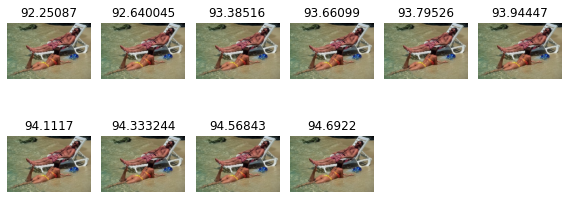

In [76]:
import matplotlib.pyplot as plt
import numpy as np
img = Image.open("/content/drive/MyDrive/Corel-1k/dataset/test_set/bus/300.jpg")
# img = Image.open("/content/drive/MyDrive/Corel-1k/dataset/training_set/beaches/110.jpg")
query = fe.extract(img)
dists = np.linalg.norm(features-query, axis=1)
ids = np.argsort(dists)[:10]

scores = [(dists[label_builder], image_path) for label_builder in ids]

print(scores)

# Visualize
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*2):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()
